In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
print(x_train)# x-train is a 2d array where each 2d array corresponds to an image

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [4]:
print(x_train[4])# it is the 2D data of a single image ,in mnist the images are 28*28 pixels that means we will have
                 # an array of dimession 28*28 
                 #having values ranging from 0 to 255 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

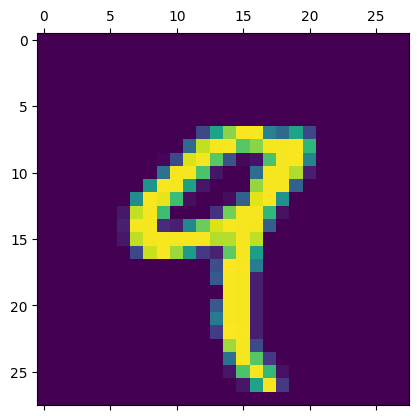

In [5]:
plt.matshow(x_train[4])

In [6]:
print(y_train[0:9])# this just means that the Y-train contains labels 

[5 0 4 1 9 2 1 3 1]


# Scalling to improve accuracy

In [7]:
x_train =x_train/225
x_test=x_test/225


# We need to convert the 2D array into single dimension so that it can be input into the neural networks
# for that we use a pandas function called reshape

In [8]:
x_train_flattened=x_train.reshape(len(x_train),28*28)# we need to reshape into a single dimension ,that is the number of images(6000),(28*28)
x_train_flattened.shape
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

# A Simple neural network

In [9]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
    

/Users/jowinjosephraju/Miniproject/tensorenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - accuracy: 0.8265 - loss: 0.6791
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.9141 - loss: 0.3038
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - accuracy: 0.9210 - loss: 0.2801
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 400us/step - accuracy: 0.9229 - loss: 0.2732
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - accuracy: 0.9264 - loss: 0.2658


In [13]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.9134 - loss: 0.3093


[0.26968568563461304, 0.9243000149726868]

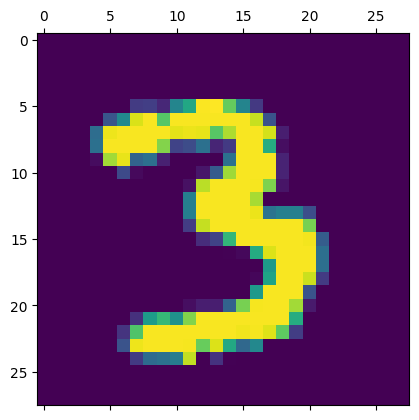

In [14]:
plt.matshow(x_test[500])

In [15]:
y_predicted=model.predict(x_test_flattened)
y_predicted[500]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


array([3.1384341e-05, 1.9215198e-05, 8.2604028e-02, 9.9993968e-01,
       9.4409763e-05, 2.9855825e-02, 1.0985960e-06, 6.6413826e-01,
       5.8457941e-02, 3.7685276e-03], dtype=float32)

In [17]:
np.argmax(y_predicted[500])

3

# Training With Hidden Layers


In [13]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - accuracy: 0.8703 - loss: 0.4475
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 943us/step - accuracy: 0.9621 - loss: 0.1313
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - accuracy: 0.9748 - loss: 0.0841
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - accuracy: 0.9801 - loss: 0.0632
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - accuracy: 0.9849 - loss: 0.0512


In [88]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.9687 - loss: 0.1009


[0.0859985500574112, 0.973800003528595]